## Загрузка датасета

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import h5py

In [2]:
from keras.models import load_model

Using TensorFlow backend.


In [11]:
try:
    dataset.close()
except:
    pass
dataset = h5py.File('/home/kmouraviev/NYU_dataset_hdf5/data.hdf5', 'r')
rgbs_val = dataset['data']
depths_val = dataset['label']
ids = np.random.choice(np.arange(len(rgbs_val)), size=10, replace=False)
rgbs_test = np.array([rgbs_val[k] for k in ids])
depths_test = np.array([depths_val[k] for k in ids])

## Визуализация предсказаний сети

In [9]:
fcrn_model = load_model('/home/kmouraviev/FCRN_notebooks/finetune_with_log_mse/model_after_stage_1.hdf5')

In [13]:
predictions = fcrn_model.predict(rgbs_test)
predictions = np.exp(predictions) - 1e-2
predictions = np.clip(predictions, 0, 10)

In [18]:
predictions_raw = fcrn_model.predict(rgbs_test)

In [24]:
print(np.log(depths_test).min(), np.log(depths_test).max())

-0.33691484619338413 2.2994367837546306


In [21]:
print("log-MSE:", np.mean((predictions_raw - np.log(depths_test)) ** 2))

log-MSE: 0.08637233962569842


In [23]:
print("MSE", np.mean((predictions - depths_test) ** 2))

MSE 1.341002239964228


In [14]:
def unpreprocess(image):
    img_min = -123
    img_max = 151
    return (image - img_min) / (img_max - img_min)

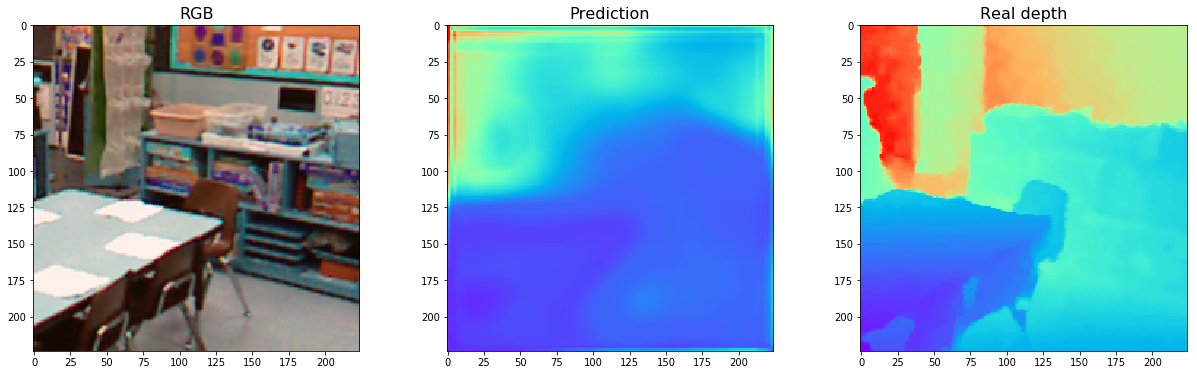

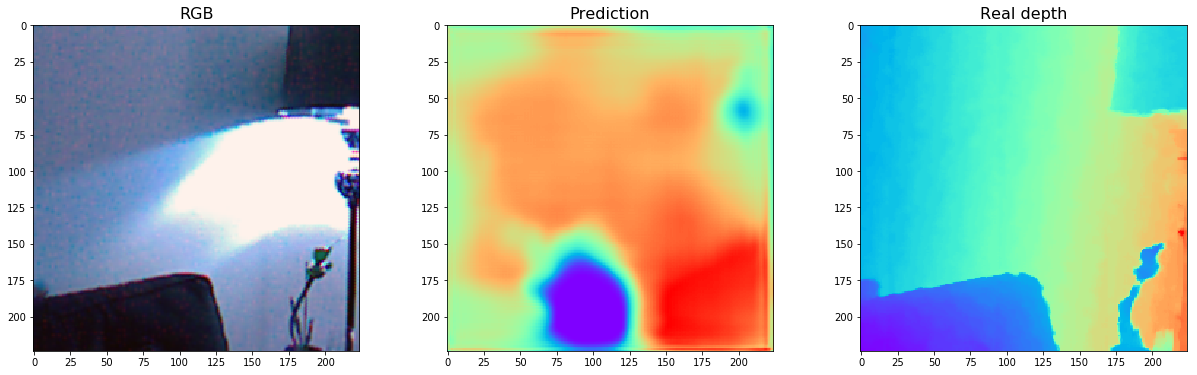

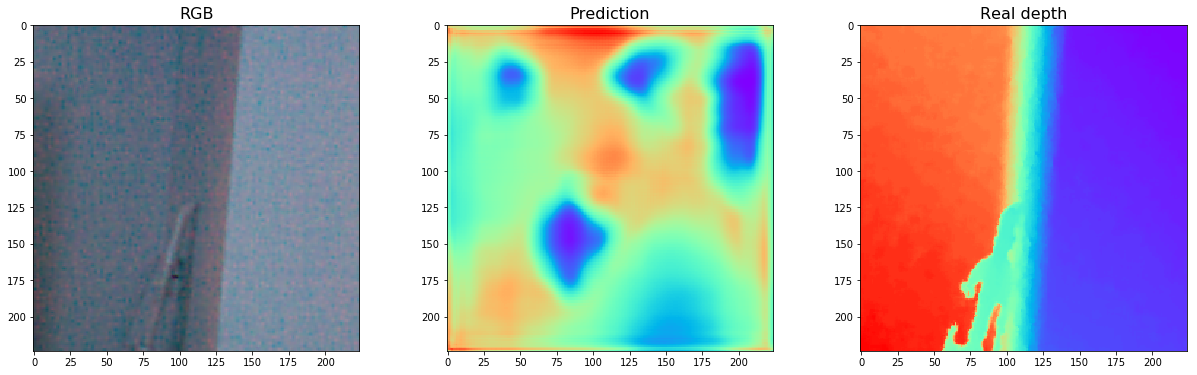

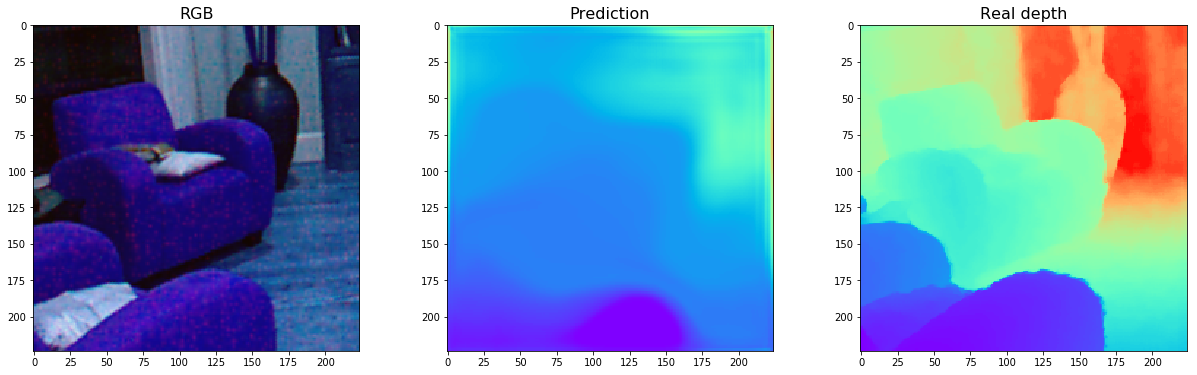

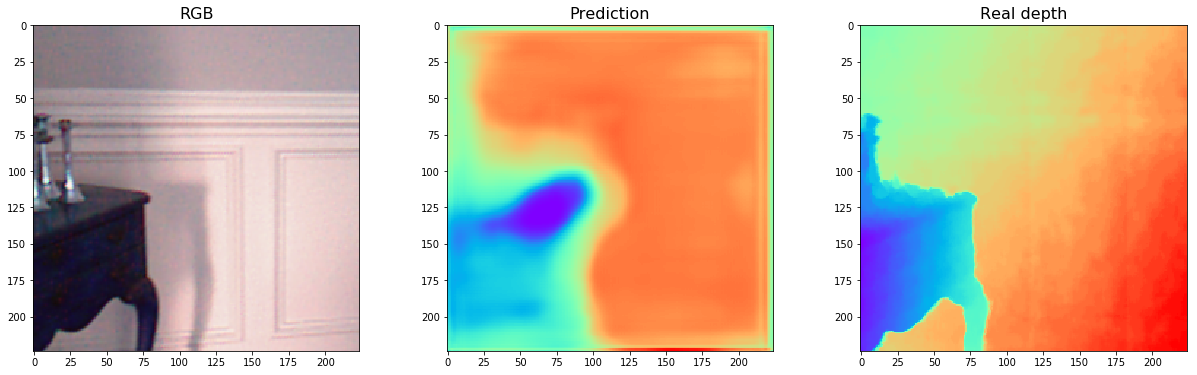

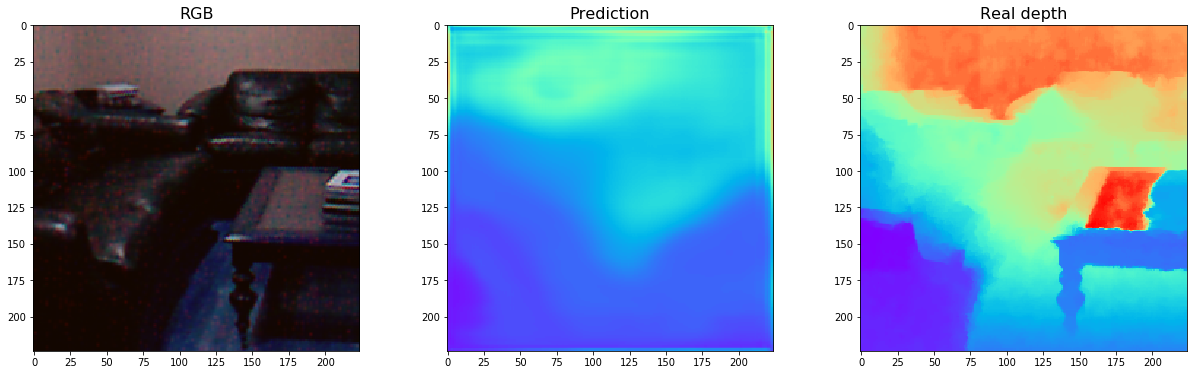

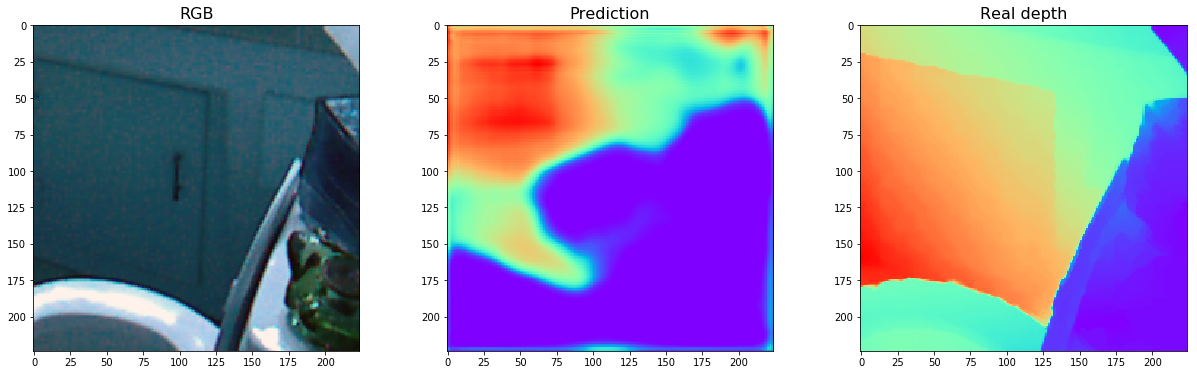

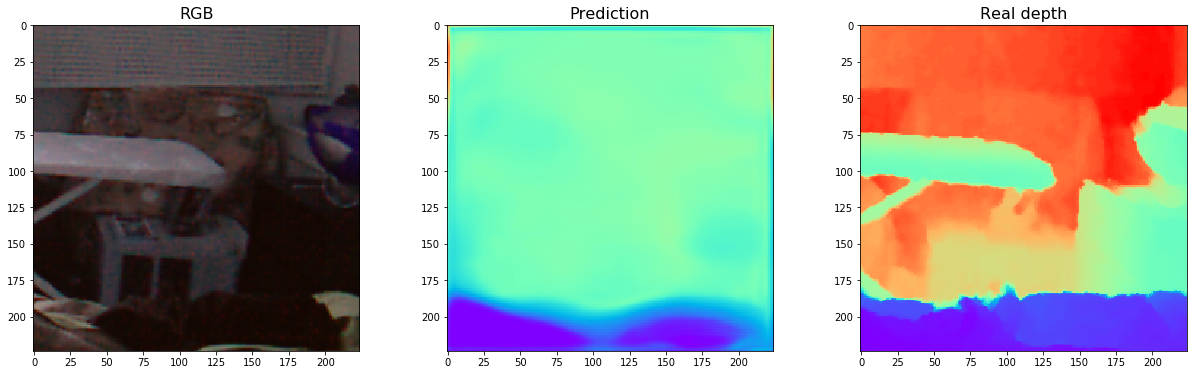

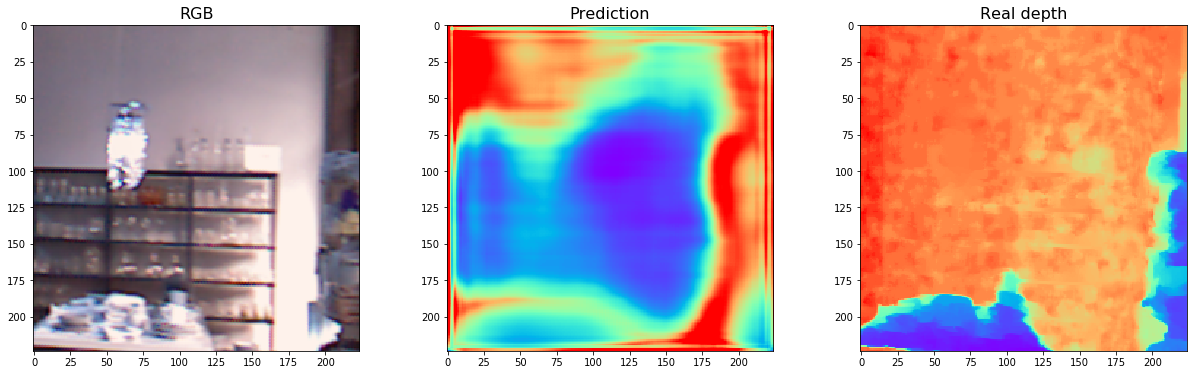

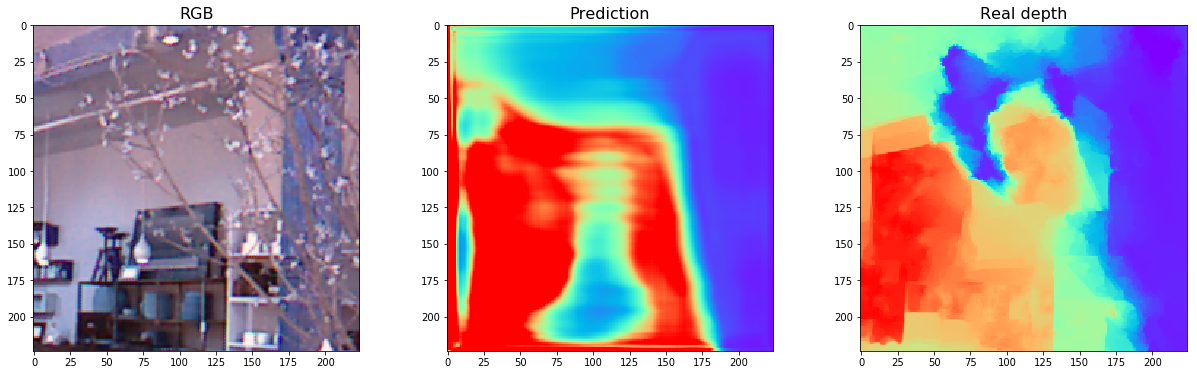

In [16]:
for i in range(len(rgbs_test)):
    plt.figure(figsize=(21, 6))
    plt.subplot(1, 3, 1)
    plt.title("RGB", fontsize=16)
    plt.imshow(unpreprocess(rgbs_test[i]))
    plt.subplot(1, 3, 2)
    plt.title("Prediction", fontsize=16)
    plt.imshow(predictions[i] / 10., cmap='rainbow')
    plt.subplot(1, 3, 3)
    plt.title("Real depth", fontsize=16)
    plt.imshow(depths_test[i] / 10., cmap='rainbow')